In [22]:
import pandas as pd
from nltk.corpus import stopwords
from textblob import Word, TextBlob
from wordcloud import WordCloud
from warnings import filterwarnings
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv("datasets\wiki_data.csv",index_col=0)
df.head()        

,text
1,Anovo\n\nAnovo (formerly A Novo) is a computer...
2,Battery indicator\n\nA battery indicator (also...
3,"Bob Pease\n\nRobert Allen Pease (August 22, 19..."
4,CAVNET\n\nCAVNET was a secure military forum w...
5,CLidar\n\nThe CLidar is a scientific instrumen...


In [6]:
def clean_text(text):
    text=text.str.lower()
    text=text.str.replace('[^\w\s]','',regex=True)
    text=text.str.replace('\n','')
    text=text.str.replace('\d','',regex=True)
    return text

df["text"]=clean_text(df["text"])
df.head()

,text
1,anovoanovo formerly a novo is a computer servi...
2,battery indicatora battery indicator also know...
3,bob peaserobert allen pease august â â june ...
4,cavnetcavnet was a secure military forum which...
5,clidarthe clidar is a scientific instrument us...


In [9]:
def remove_stopwords(text):
    sw=stopwords.words('english')
    text=text.apply(lambda x: " ".join(x for x in str(x).split() if x not in sw))
    return text
df["text"]=remove_stopwords(df["text"])
df.head()

,text
1,anovoanovo formerly novo computer services com...
2,battery indicatora battery indicator also know...
3,bob peaserobert allen pease august â â june an...
4,cavnetcavnet secure military forum became oper...
5,clidarthe clidar scientific instrument used me...


In [11]:
temp_df=pd.Series(' '.join(df['text']).split()).value_counts()
drops=temp_df[temp_df<=1]
df['text']= df['text'].apply(lambda x: ' '.join(x for x in x.split() if x not in drops))
df['text']

1        formerly novo computer services company based ...
2        battery indicatora battery indicator also know...
3        bob allen pease august â â june analog integra...
4        secure military forum became operational april...
5        clidar scientific instrument used measuring pa...
                               ...                        
10855    llc privately funded company creates wireless ...
10856    spectrum analyzera spectrum analyzer measures ...
10857    telepresence technology term used national oce...
10858    transpacific profiler networkthe transpacific ...
10859    transfer casea transfer case part drivetrain f...
Name: text, Length: 10859, dtype: object

In [13]:
df['text'].apply(lambda x: TextBlob(x).words).head()

1    [formerly, novo, computer, services, company, ...
2    [battery, indicatora, battery, indicator, also...
3    [bob, allen, pease, august, â, â, june, analog...
4    [secure, military, forum, became, operational,...
5    [clidar, scientific, instrument, used, measuri...
Name: text, dtype: object

In [14]:
df['text'] = df['text'].apply(lambda x: ' '.join([Word(word).lemmatize() for word in x.split()]))
df['text']

1        formerly novo computer service company based b...
2        battery indicatora battery indicator also know...
3        bob allen pea august â â june analog integrate...
4        secure military forum became operational april...
5        clidar scientific instrument used measuring pa...
                               ...                        
10855    llc privately funded company creates wireless ...
10856    spectrum analyzera spectrum analyzer measure m...
10857    telepresence technology term used national oce...
10858    transpacific profiler networkthe transpacific ...
10859    transfer casea transfer case part drivetrain f...
Name: text, Length: 10859, dtype: object

In [19]:
filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [20]:
#Kelime frekansları hesaplanması
tf=df['text'].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
tf.columns=["words","tf"]
tf.sort_values("tf", ascending=False)

,words,tf
34,used,29034.00
46,system,25369.00
59,also,22786.00
56,use,16461.00
548,one,15828.00
...,...,...
63658,smartphonebased,2.00
20991,shiman,2.00
63656,selfaware,2.00
63654,reprography,2.00


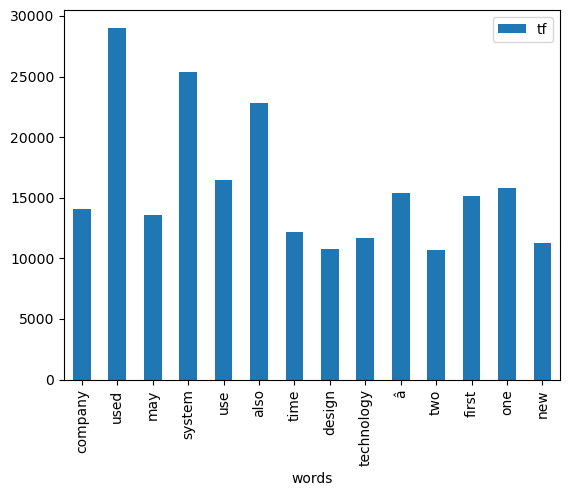

In [28]:
tf[tf["tf"]>10000].plot.bar(x="words", y="tf")
plt.show()

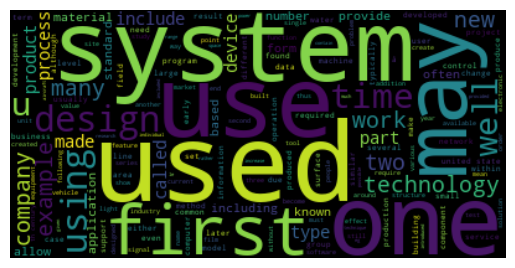

In [29]:
#word cloud
text= " ".join(i for i in df.text)
wordcloud= WordCloud().generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()